In [8]:
from __future__ import annotations
from utils_to_build_QAOAAnsatz import *
import pprint

pprint.pprint(info)

{1: {'exact_covers': ['101100'],
     'mec': '101100',
     'subsets': [{4, 6, 7, 9, 10, 11},
                 {1, 2, 5, 6, 11, 12},
                 {8, 1, 12},
                 {2, 3, 5},
                 {1, 3, 4, 5, 9, 12},
                 {2, 6, 7, 9, 12}]},
 2: {'exact_covers': ['011000'],
     'mec': '011000',
     'subsets': [{2, 11, 12, 6},
                 {2, 4, 6, 8, 9, 11},
                 {1, 3, 5, 7, 10, 12},
                 {2, 7},
                 {2, 3, 4, 5, 8, 12},
                 {1, 2, 8, 9, 12}]},
 3: {'exact_covers': ['110001', '011000'],
     'mec': '011000',
     'subsets': [{8, 10, 3},
                 {2, 4, 5, 6, 9, 11, 12},
                 {1, 3, 7, 8, 10},
                 {3, 4, 6, 8, 11},
                 {2, 3, 4, 6, 7, 9, 12},
                 {1, 7}]},
 4: {'exact_covers': ['100100', '011001'],
     'mec': '100100',
     'subsets': [{1, 4, 5, 6, 8, 11, 12},
                 {3, 6, 8, 9, 10},
                 {1, 2, 11, 5},
                 {2, 3

In [9]:
# Random instances
folder_list_random = ["random_parameters_2025-09-12@14h56m00s", # p=3 k=1 
                      "random_parameters_2025-09-12@12h30m08s", # p=3 LEC
                      "random_parameters_2025-09-12@13h44m51s", # p=3 LEC-1
                      "random_parameters_2025-09-16@08h28m21s", # p=4 k=1 
                      "random_parameters_2025-09-10@18h01m06s", # p=4 LEC
                      "random_parameters_2025-09-21@19h13m58s"  # p=4 LEC-1
                      ]

# Wang instances
folder_list_wang = ["random_parameters_2025-09-24@10h30m53s", # p=3 k=1 
                    "random_parameters_2025-09-24@08h09m40s", # p=3 LEC
                    "random_parameters_2025-09-23@20h39m11s", # p=3 LEC-1
                    "random_parameters_2025-09-14@10h46m48s", # p=4 k=1 
                    "random_parameters_2025-09-13@16h32m19s", # p=4 LEC
                    "random_parameters_2025-09-13@13h11m55s"  # p=4 LEC-1
                    ]

labels = ["p=3 k=1",
          "p=3 LEC",
          "p=3 LEC-1",
          "p=4 k=1",
          "p=4 LEC",
          "p=4 LEC-1"
          ]

In [2]:
def extract_percentage_from_file(f, d):
    n, instance, init_name, p, random_attempts, k = define_parameters_from_filename(d, verbose=False)
    U, subsets_dict = define_instance(n, instance, verbose=False)
    EXACT_COVERS = find_spectrum(U, subsets_dict, n, k=1)[4]
    MEC = min(EXACT_COVERS, key=lambda s: s.count('1'))  # MEC is the minimal energy cover
    
    # Load CSV data into pandas DataFrame and process it.
    df = pd.read_csv(f, dtype=str).set_index('states')
    df = df.astype(float).fillna(0.0)
    
    # Read metadata to extract the attempt that reached the best result.
    with open(d, 'r') as dd:
        for line in dd:
            if 'Attempt that reached the best result with' in line:
                string = line.split('#')[1]
                i_best = string.split(' ')[0]  # Best attempt index

    # Construct the column name for the best result.
    column_best = f'counts_p{p}_{i_best}of{random_attempts}'
    
    # Get the percentage version of df, with average and range columns
    percentage = get_percentage_df(df, 
                                    cols_to_keep=[column_best], 
                                    sorting_col=column_best)
    
    
    return MEC, percentage


def find_mec_percentage(f, d):
    MEC, percentage = extract_percentage_from_file(f, d)
    tmp = percentage.copy()
    tmp["states"] = tmp.index
    tmp = tmp[tmp['states'] == MEC]  
    
    if tmp.empty:
        mec_percentage = 0
    else:
        mec_percentage = tmp.iloc[0][tmp.columns[0]]
        
    return mec_percentage

def build_vector_of_mec_percentages(files, data):
    mec_percentages = []
    for f, d in zip(files, data):
        mec_percentage = find_mec_percentage(f, d)
        mec_percentages.append(mec_percentage)

    return mec_percentages, np.mean(mec_percentages)


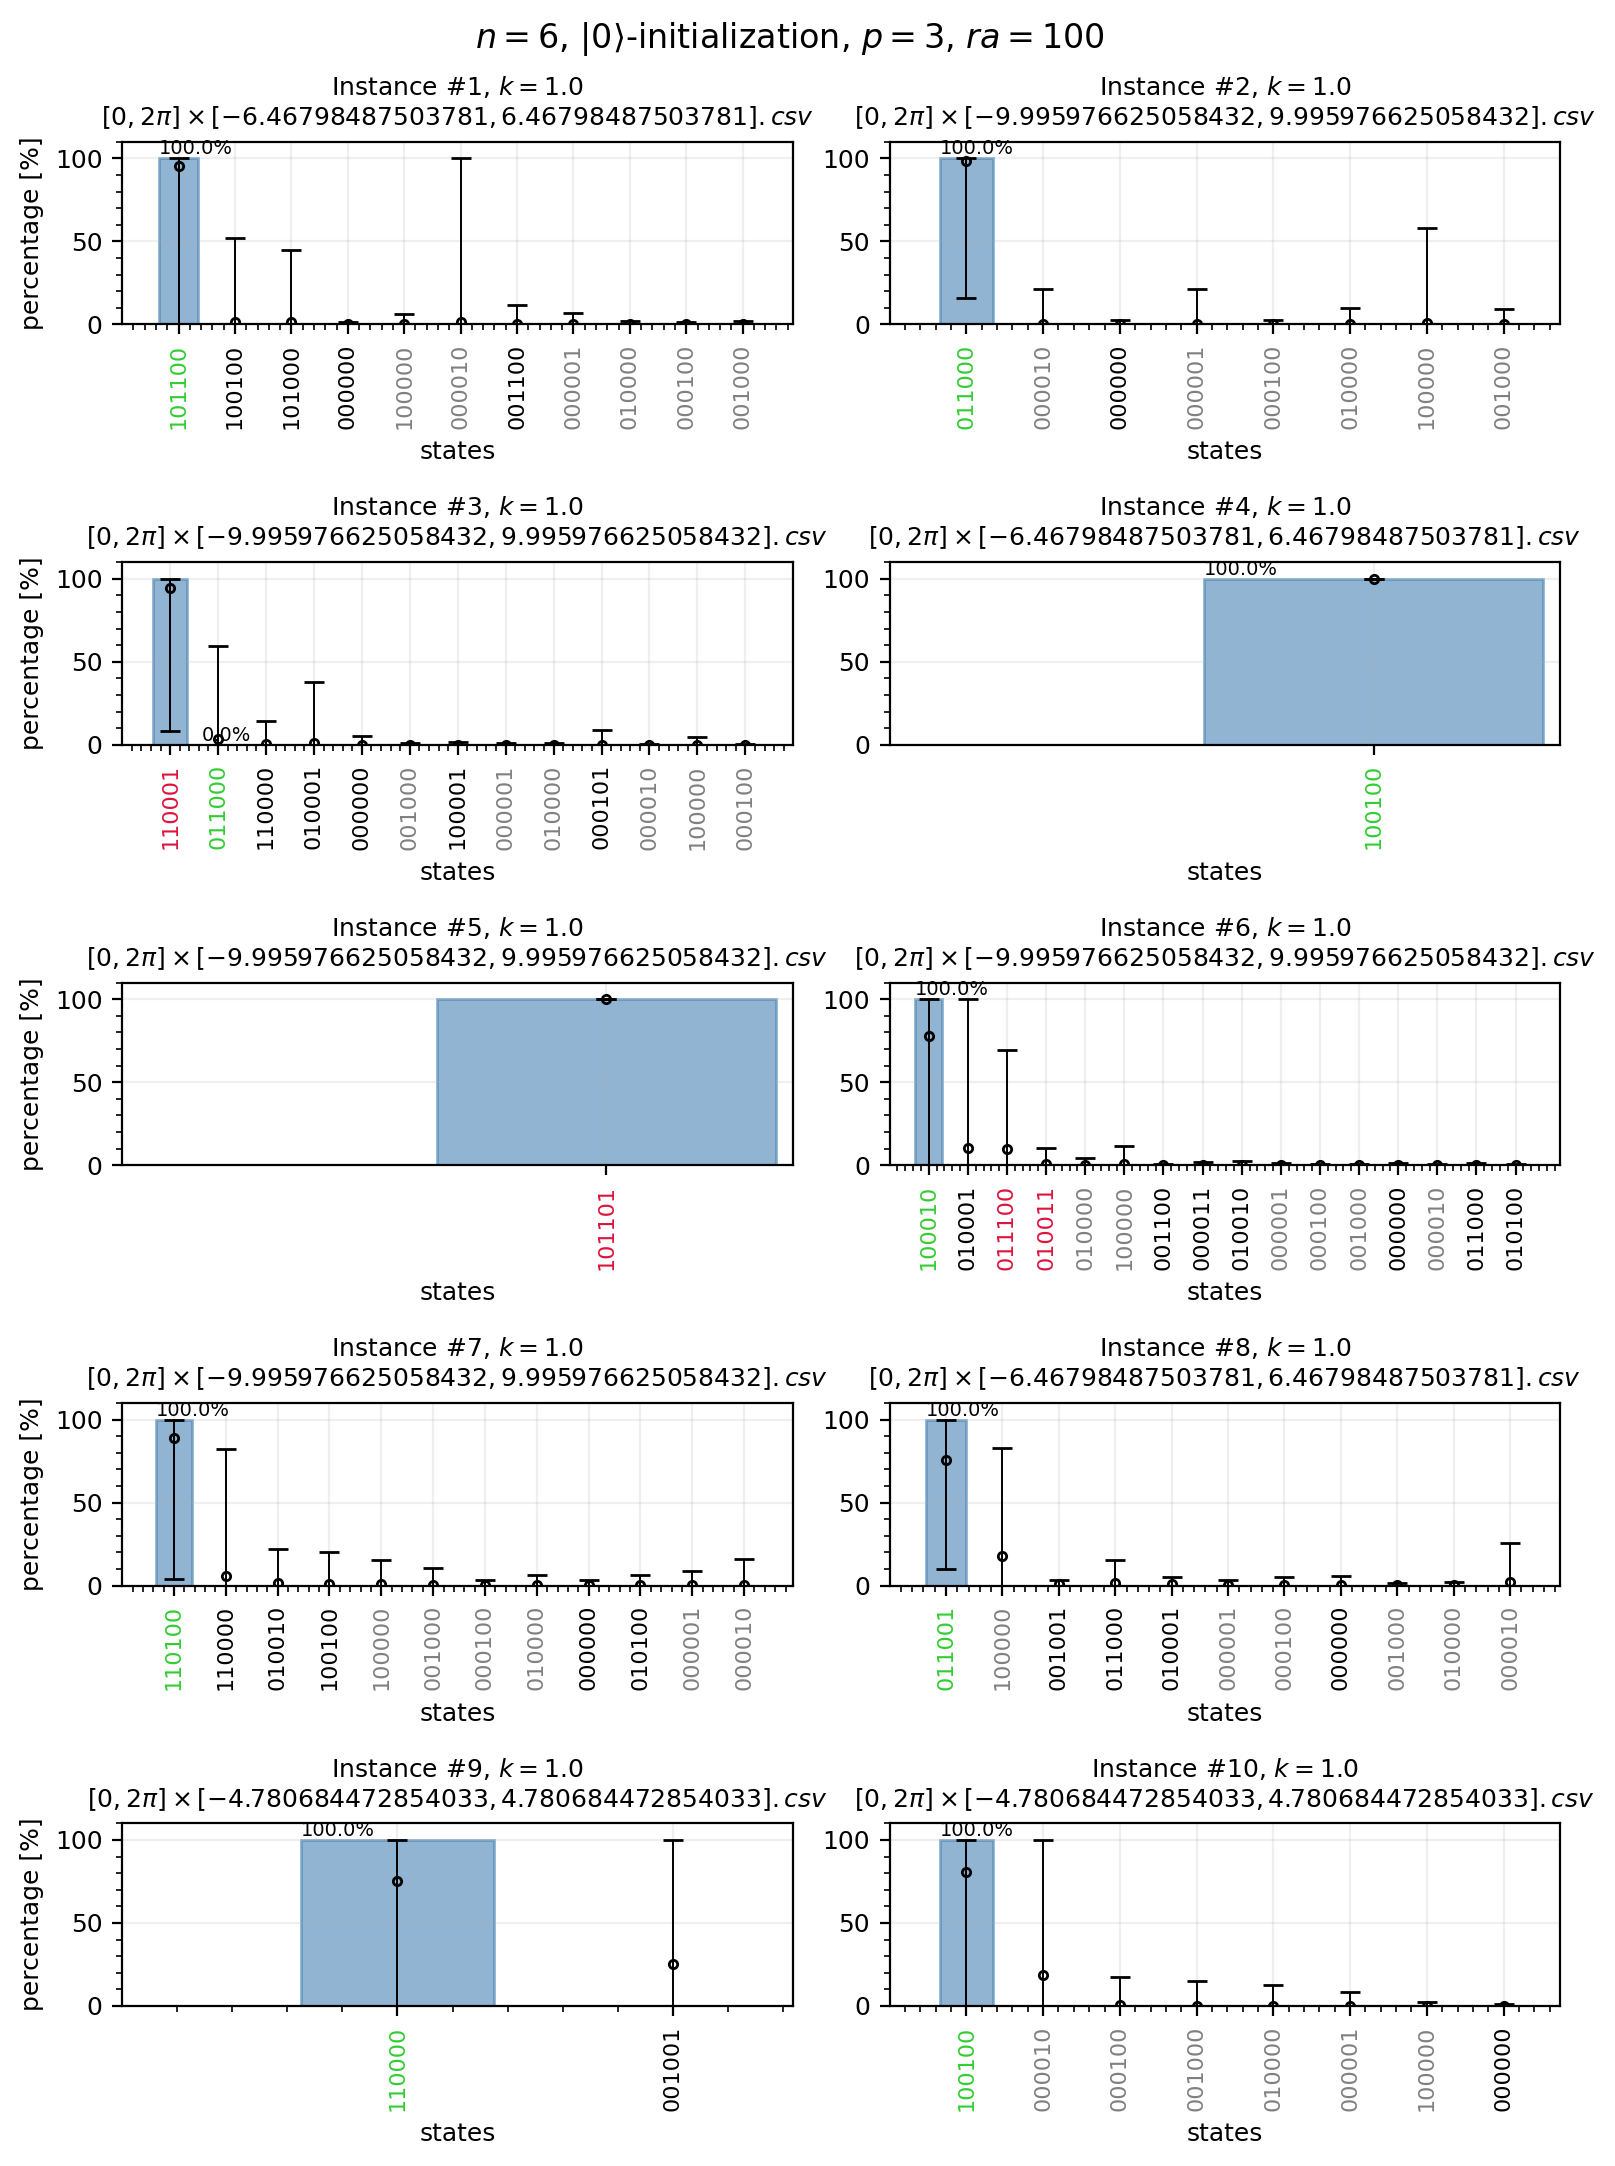

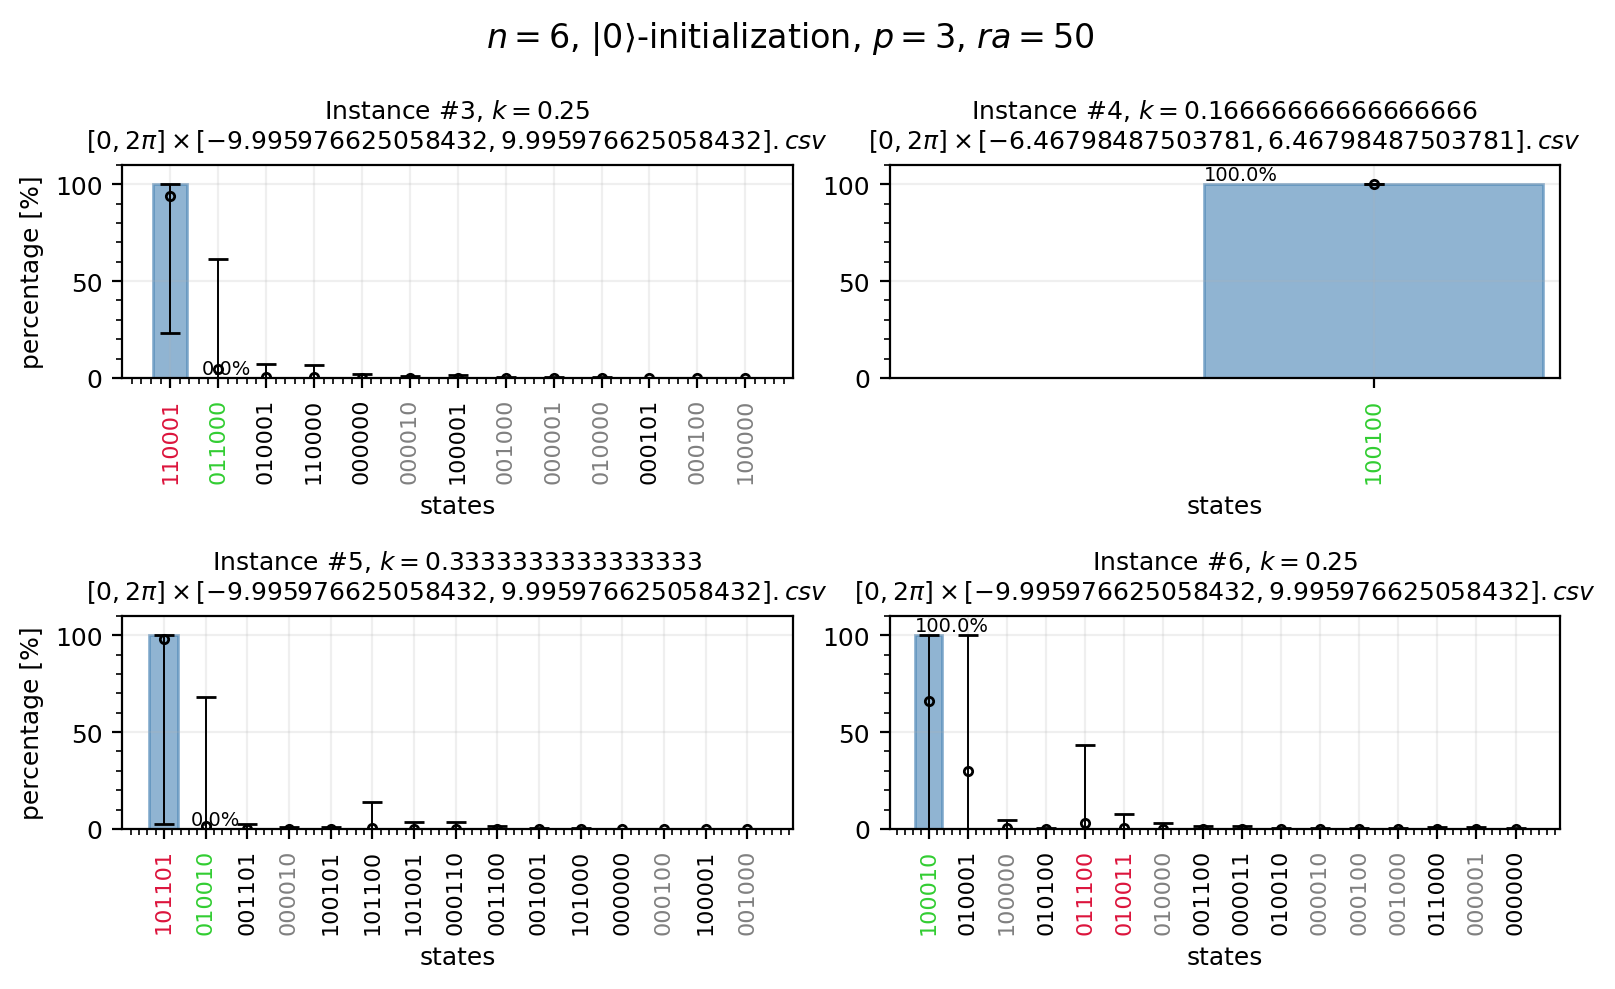

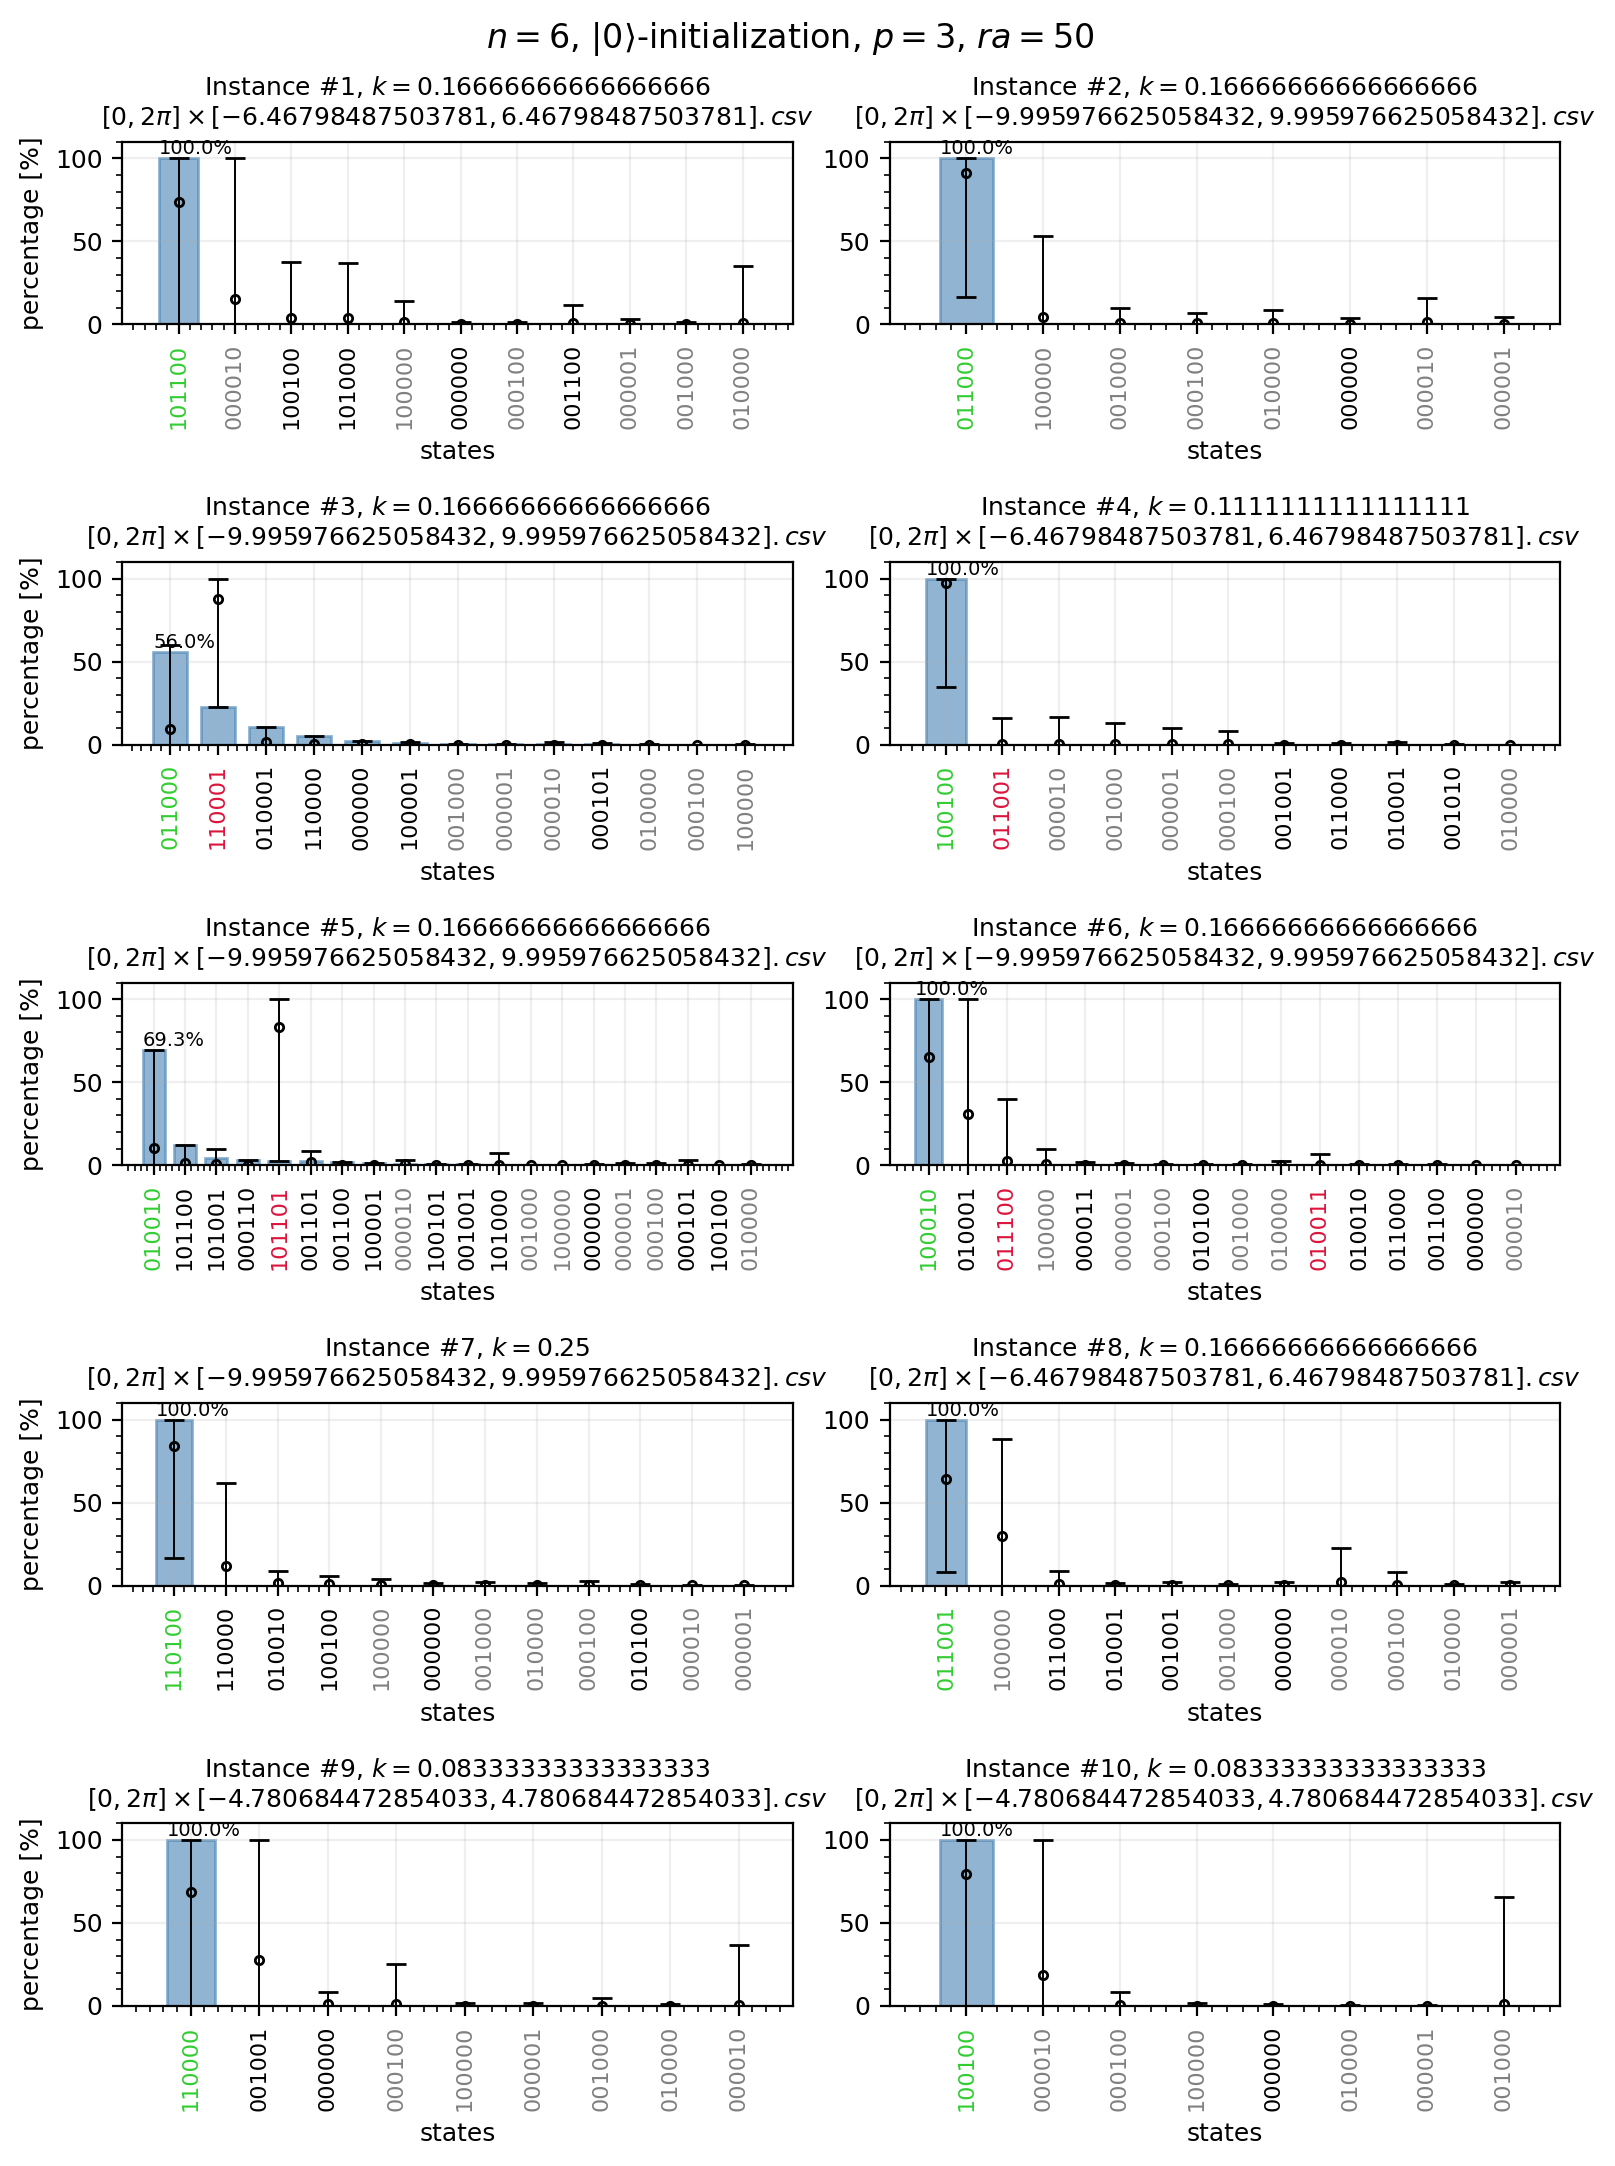

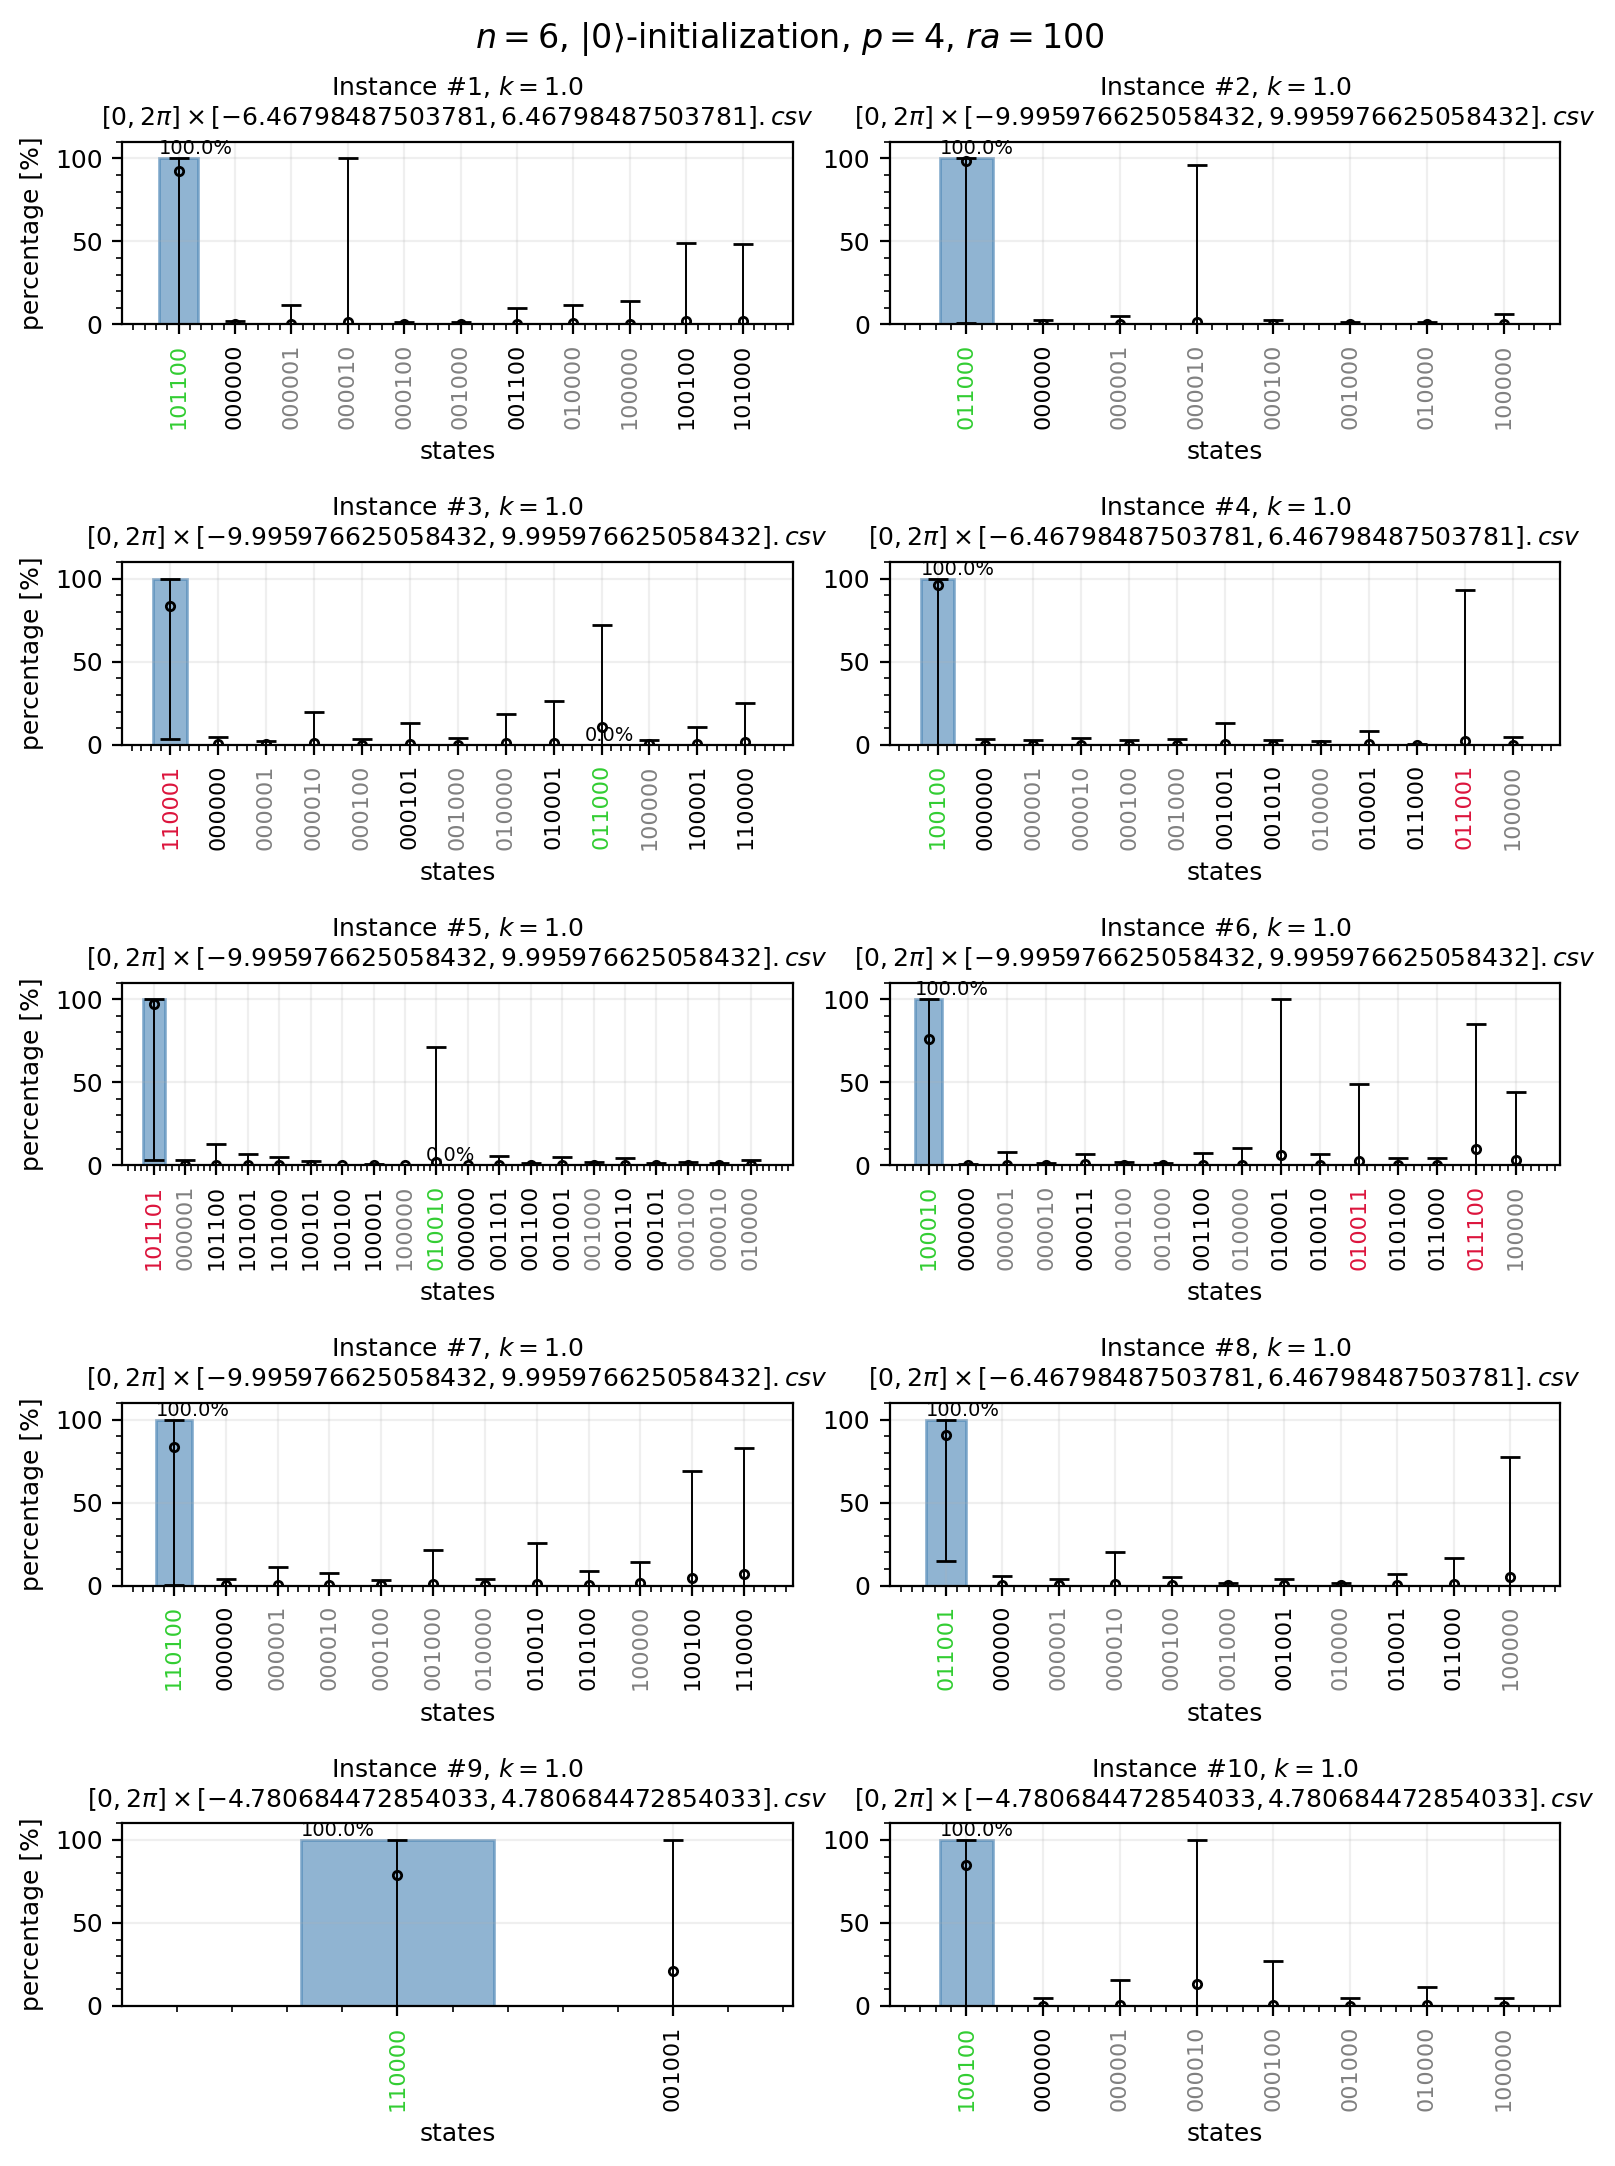

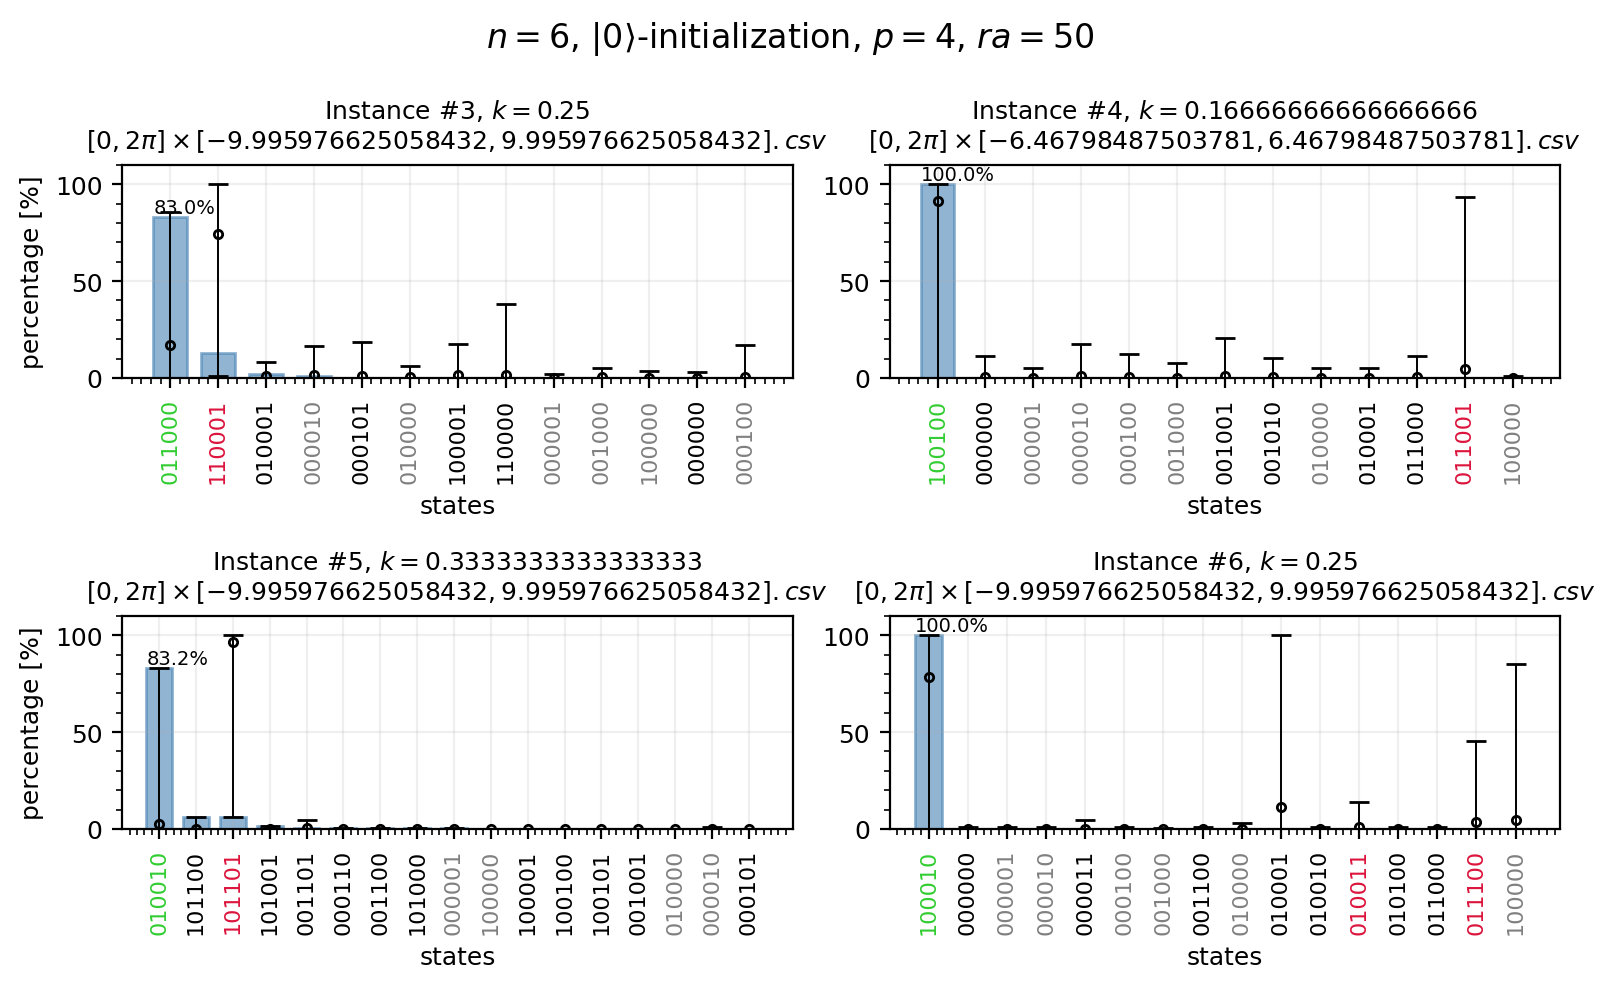

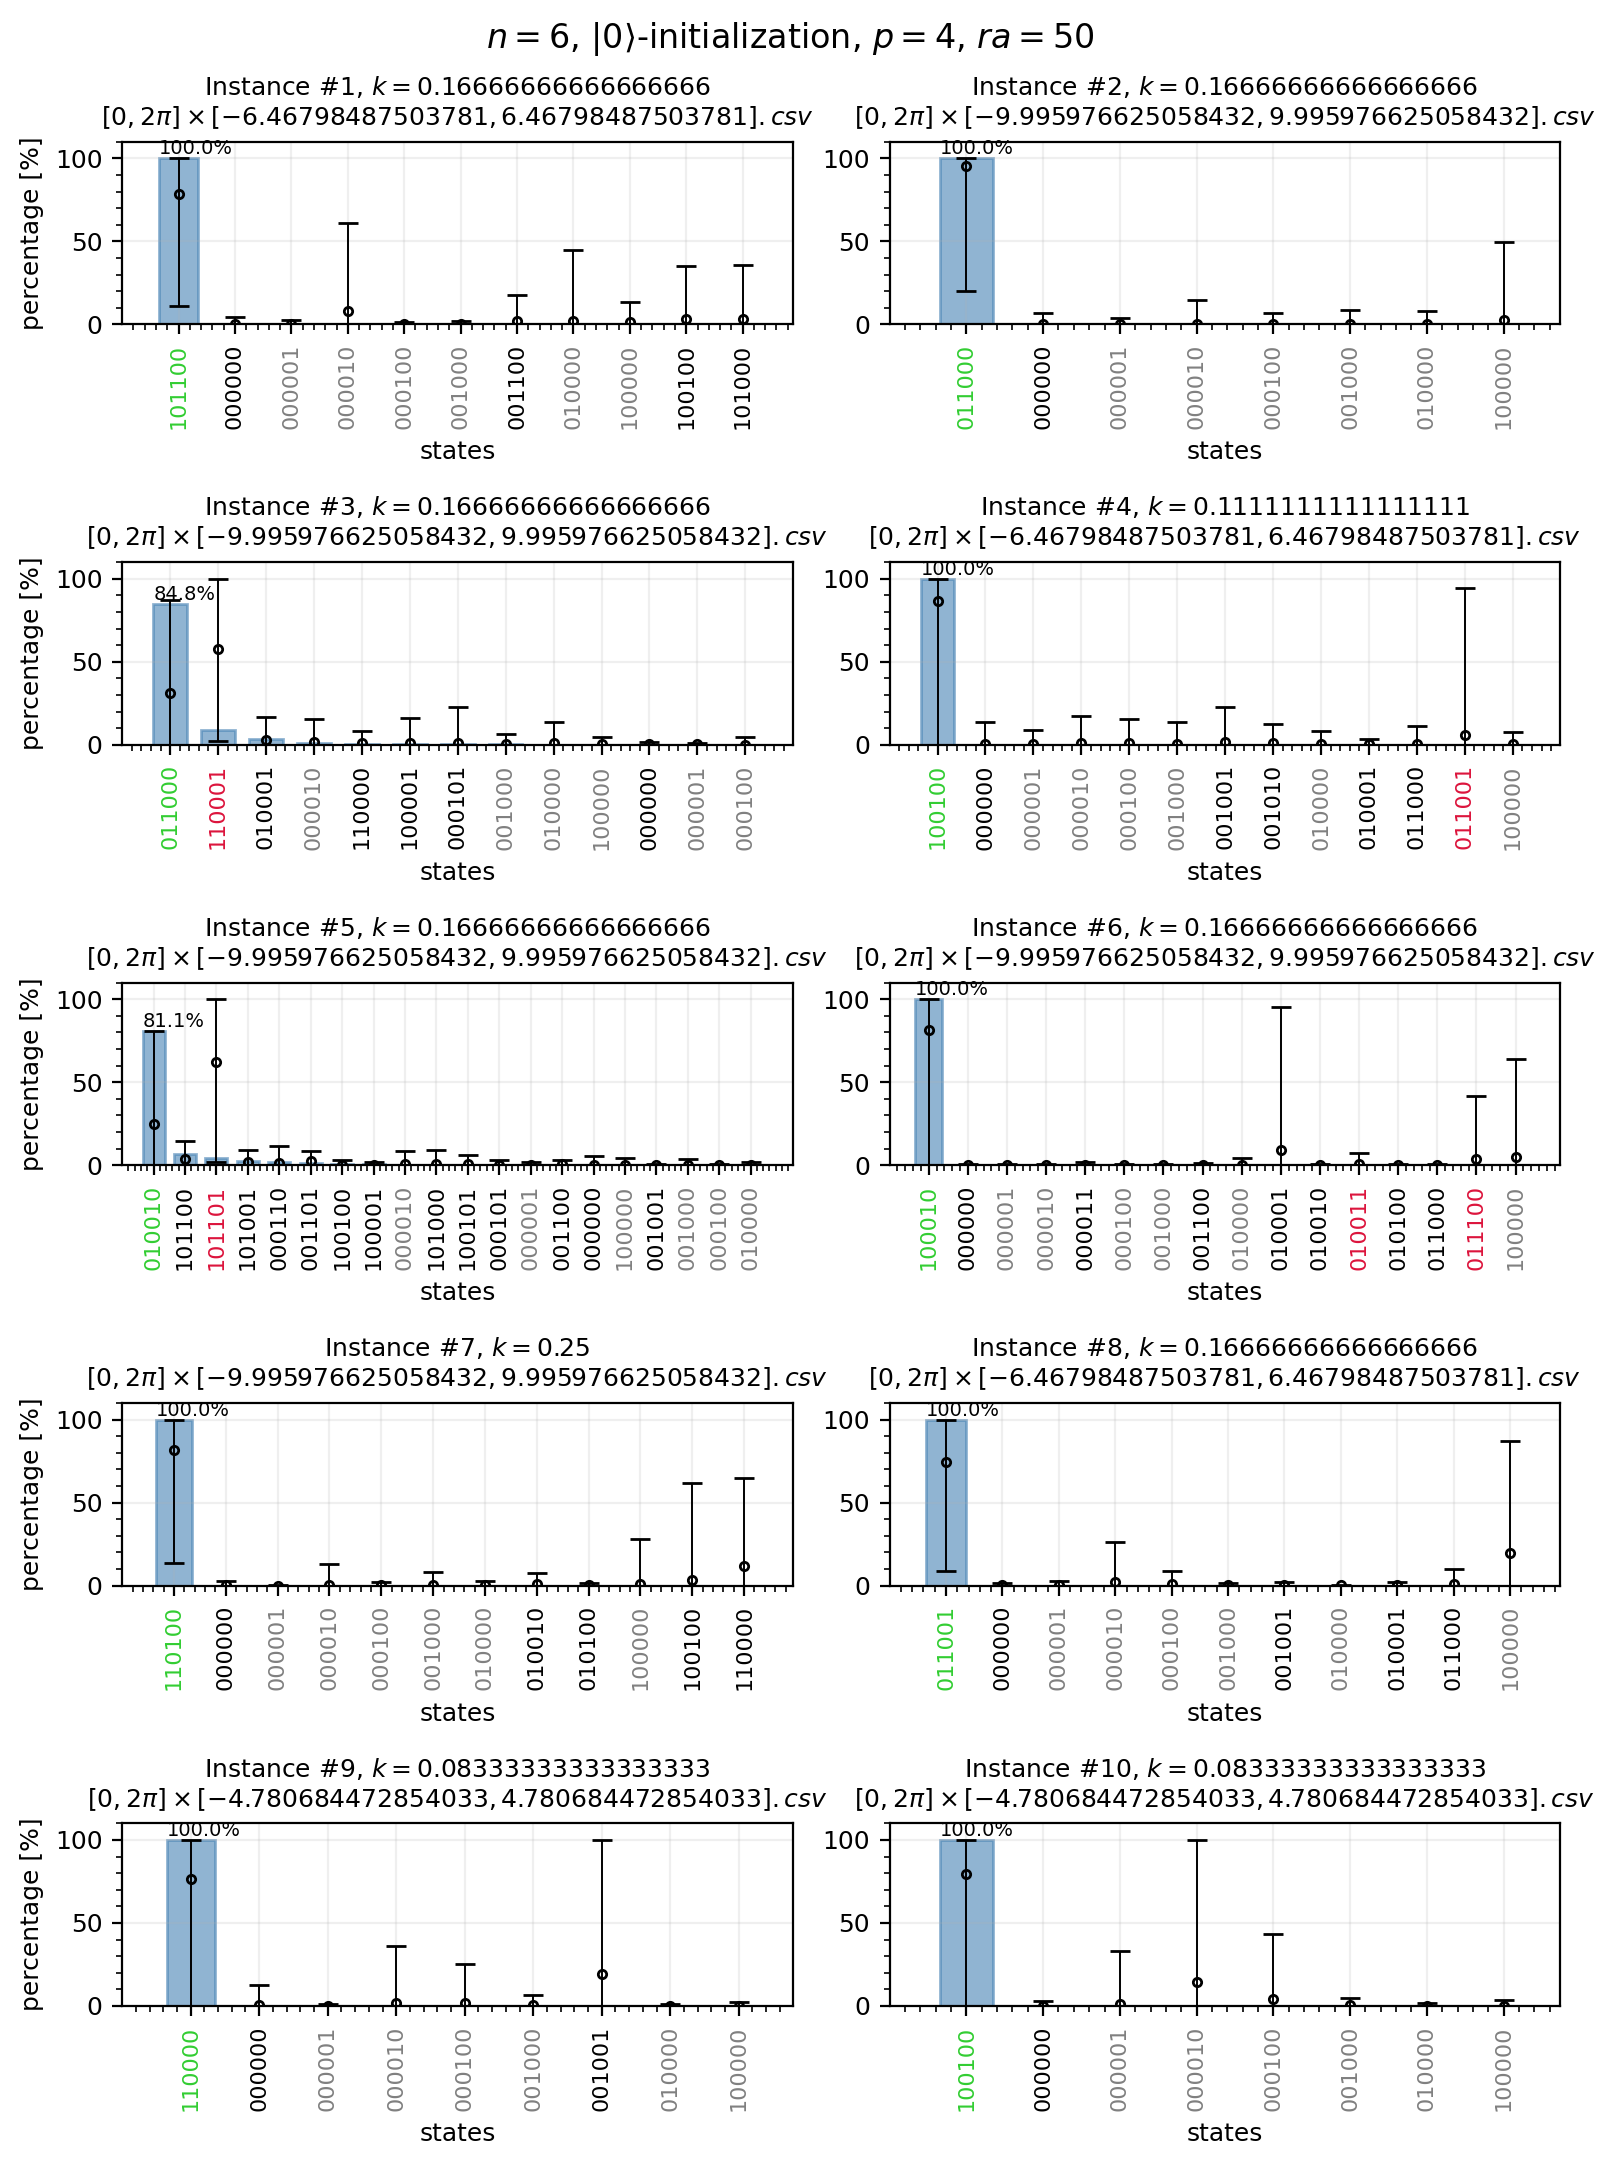

In [14]:
# for folder in folder_list_random:
for folder in folder_list_wang:
    # Find the files that contain every string in 'substrings'.
    FILENAME_list, DATA_FILENAME_list = find_files_containing_string(path= f"./{folder}/")

    # Get the number of files collected.
    num_files = len(FILENAME_list)

    if num_files>1:
        plot_list_of_files(FILENAME_list, DATA_FILENAME_list,
                           colorchosen="steelblue", alpha=0.6,
                           init_name="all1",
                           dont_show_in_title=["i", "k"],
                           dont_show_in_titles=["n", "p", "ra", "init"],
                           figsize=(8,num_files+1),
                           dpi=200, N=9) # figsize=(10, 13), dpi=300, N=12 for latex figures
    else:
        plot_file(FILENAME_list[0], DATA_FILENAME_list[0],
                  colorchosen='indigo', alpha=0.4,
                  dont_show_in_title = [],
                  figsize=(10,4), dpi=200, N=10)

In [ ]:
# plot_each_attempt_from_folder(folder_path)

Per Wang considero solo le 4 istanze problematiche

In [13]:
#********** Wang **********
mec_mean_vec = []
for folder, label in zip(folder_list_wang, labels):
    files, data = find_files_containing_string(path= f"./{folder}/")
    
    if label == "p=3 LEC" or label == "p=4 LEC":
        mec_percentages, mec_mean = build_vector_of_mec_percentages(files, data)
    else:
        mec_percentages, _ = build_vector_of_mec_percentages(files, data)
        mec_percentages = mec_percentages[2:6]
        mec_mean = np.mean(mec_percentages)
    mec_mean_vec.append(mec_mean)
    print(f"♦ {label} ♦")
    print(f"   folder '{folder}':\n   mec_percentages = {mec_percentages} %, \n   mean: {mec_mean} %")
print("\nmec_mean_perc_vec = ", mec_mean_vec)


# ********** Random **********
# mec_mean_vec = []
# for folder, label in zip(folder_list_wang, labels):
#     files, data = find_files_containing_string(path= f"./{folder}/")
#     mec_percentages, mec_mean = build_vector_of_mec_percentages(files, data)
#     mec_mean_vec.append(mec_mean)
#     print(f"♦ {label} ♦")
#     print(f"   folder '{folder}':\n   mec_percentages = {mec_percentages} %, \n   mean: {mec_mean} %")
# print("\nmec_mean_perc_vec = ", mec_mean_vec)

♦ p=3 k=1 ♦
   folder 'random_parameters_2025-09-24@10h30m53s':
   mec_percentages = [0.0, 100.0, 0, 100.0] %, 
   mean: 50.0 %
♦ p=3 LEC ♦
   folder 'random_parameters_2025-09-24@08h09m40s':
   mec_percentages = [0.0, 100.0, 0.0, 100.0] %, 
   mean: 50.0 %
♦ p=3 LEC-1 ♦
   folder 'random_parameters_2025-09-23@20h39m11s':
   mec_percentages = [55.95703125, 100.0, 69.3359375, 100.0] %, 
   mean: 81.3232421875 %
♦ p=4 k=1 ♦
   folder 'random_parameters_2025-09-14@10h46m48s':
   mec_percentages = [0.0, 100.0, 0.0, 100.0] %, 
   mean: 50.0 %
♦ p=4 LEC ♦
   folder 'random_parameters_2025-09-13@16h32m19s':
   mec_percentages = [83.0078125, 100.0, 83.203125, 100.0] %, 
   mean: 91.552734375 %
♦ p=4 LEC-1 ♦
   folder 'random_parameters_2025-09-13@13h11m55s':
   mec_percentages = [84.765625, 100.0, 81.0546875, 100.0] %, 
   mean: 91.455078125 %

mec_mean_perc_vec =  [50.0, 50.0, 81.3232421875, 50.0, 91.552734375, 91.455078125]
♦ p=3 k=1 ♦
   folder 'random_parameters_2025-09-24@10h30m53s':
   m

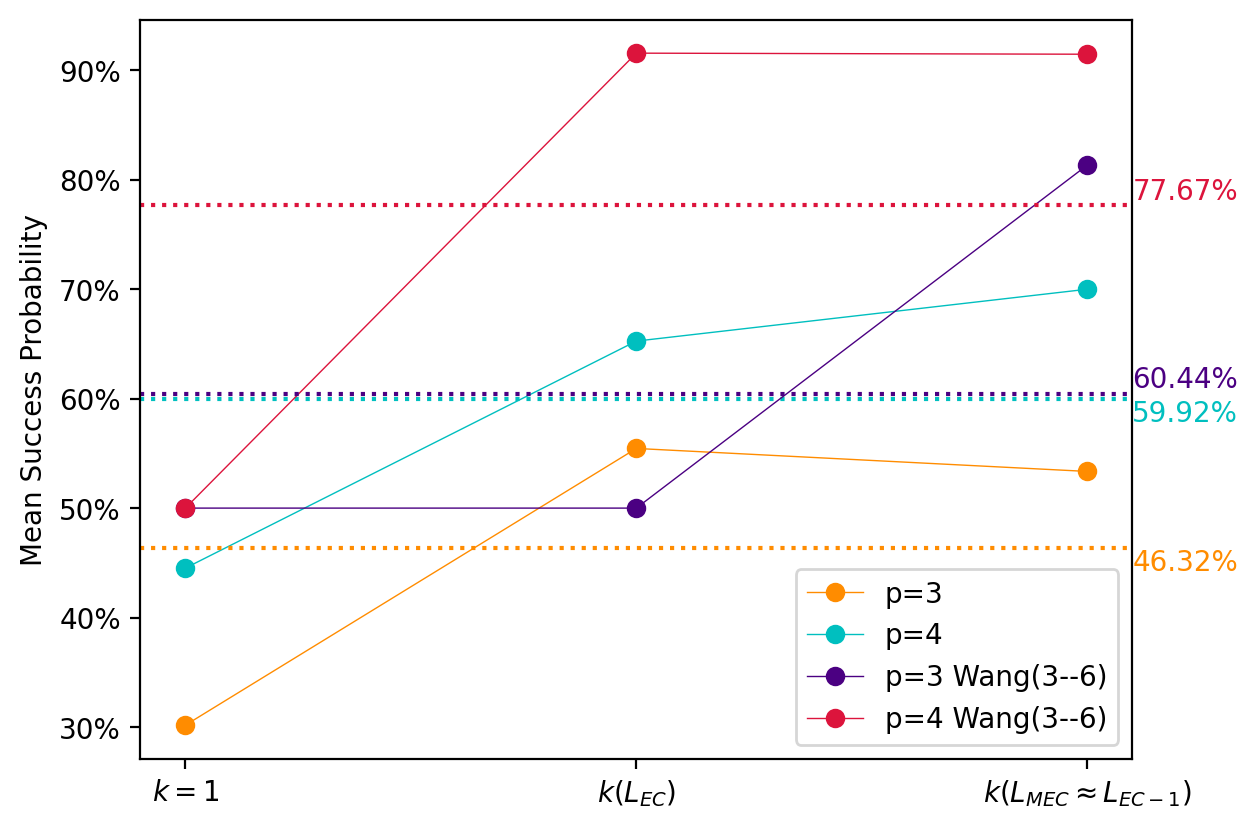

In [45]:
plt.figure(dpi=100)

# Random
p3 = [30.17578125, 55.44921875, 53.349609375]
p4 = [44.521484375, 65.25390625, 69.990234375]

l = "solid"
lw = 0.5
plt.plot(p3, "o", linestyle=l, linewidth=lw, label="p=3", color='darkorange')
plt.plot(p4, "o", linestyle=l, linewidth=lw, label="p=4", color='c')
mean_p4 = np.mean(p4)
mean_p3 = np.mean(p3)
plt.axhline(mean_p3, linestyle='dotted', color='darkorange')
plt.axhline(mean_p4, linestyle='dotted', color='c')
plt.text(2.1, mean_p3, f"{mean_p3:.2f}%", color='darkorange', va='top')
plt.text(2.1, mean_p4, f"{mean_p4:.2f}%", color='c', va='top')
# Wang
p3 = [50.0, 50.0, 81.3232421875]
p4 = [50.0, 91.552734375, 91.455078125]

plt.plot(p3, "o", linestyle=l, linewidth=lw, label="p=3 Wang(3--6)", color='indigo')
plt.plot(p4, "o", linestyle=l, linewidth=lw, label="p=4 Wang(3--6)", color='crimson')
mean_p4 = np.mean(p4)
mean_p3 = np.mean(p3)
plt.axhline(mean_p3, linestyle='dotted', color='indigo')
plt.axhline(mean_p4, linestyle='dotted', color='crimson')
plt.text(2.1, mean_p3, f"{mean_p3:.2f}%", color='indigo', va='bottom')
plt.text(2.1, mean_p4, f"{mean_p4:.2f}%", color='crimson', va='bottom')

plt.legend()
plt.xticks([0, 1, 2], ["$k=1$", "$k(L_{EC})$", "$k(L_{MEC} \\approx L_{EC-1})$"])
plt.yticks([x for x in range(30, 91, 10)],[f"{x}%" for x in range(30, 91, 10)])
plt.ylabel("Mean Success Probability")
plt.show()